In [1]:
import pandas as pd

### Создание DataFrame с нуля
Существует множество способов создать DataFrame, однако, сейчас мы создадим его из словаря.

Создадим таблицу покупателей, и сколько купил каждый из них яблок и апельсинов.

In [3]:
data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

Передадим в конструктор DataFrame:

In [4]:
purchases = pd.DataFrame(data)

purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


**Что происходит?**

Каждая пара *(ключ, значение)* в `data` стала *столбцом* в итоговом DataFrame.

**Индексы** в этом DataFrame автоматически созданы как числа 0-3, но мы можем задать свои.

Дадим покупателям имена:

In [5]:
purchases = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])

purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Теперь мы можем найти строку, индексом которой будет имя, используя `.loc[]`:

In [6]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

## Чтение из файла

### Чтение из CSV


In [7]:
df = pd.read_csv('purchases.csv')

df

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


Однако, в CSV не указано, какой столбец является индексом. Это можно задать через аргумент `index_col`:

In [8]:
df = pd.read_csv('purchases.csv', index_col=0)

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


### Чтение из JSON


In [9]:
df = pd.read_json('purchases.json')

df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


В самой структуре файла указаны индексы:
```json
{
    "apples":
    {
        "June":3,
        "Robert":2,
        "Lily":0,
        "David":1
     },
     "oranges":
     {
         "June":0,
         "Robert":3,
         "Lily":7,
         "David":2}
     }
}
```


###  Сохранение в CSV, JSON



In [10]:
df.to_csv('new_purchases.csv')

df.to_json('new_purchases.json')



## Перейдём к делу:

Рассмотрим основы работы с данными с помощью таблицы фильмов из Кинопоиска за 2016 год:

In [100]:
movies_df = pd.read_csv("kp_all_movies.csv", index_col="name_eng")

### Осмотр данных

Открыть несколько первых строк и увидеть их можно с помощью `.head()`:

In [15]:
movies_df.head(23)

,Movie_id,Name_rus,kp_rating,runtime,kp_rating_count,movie_year,Imdb_rating,imdb_rating_count,genres,countries,cost,Critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],$1 250 000,94.0
Chûshingura,100049,47 ронинов,7.660,204,297.0,1962,7.8,1496.0,"[боевик, драма, история]",[Япония],NaN,NaN
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],$575 000,100.0
Onmyoji 2,100053,Колдун 2,7.745,113,109.0,2003,6.5,393.0,"[фэнтези, боевик]",[Япония],NaN,NaN
Ilsa the Tigress of Siberia,100096,"Ильза, тигрица из Сибири",4.286,85,151.0,1977,4.9,1211.0,[ужасы],[Канада],CAD 250 000,NaN
Pas de problème!,100098,Никаких проблем!,7.220,105,225.0,1975,6.2,228.0,[комедия],[Франция],NaN,NaN
Mackenna's Gold,10023,Золото Маккенны,7.787,128,5792.0,1969,6.8,5741.0,"[мелодрама, вестерн, приключения]",[США],$7 000 000,NaN
Coogan's Bluff,10025,Блеф Кугана,6.556,93,563.0,1968,6.5,11252.0,"[боевик, триллер]",[США],NaN,94.0
Il giorno della civetta,10026,Сова появляется днем,7.365,112,199.0,1967,7.1,689.0,"[триллер, драма, криминал, детектив]","[Италия, Франция]",NaN,NaN


**Последние** строки можно увидеть с помощью `.tail()`. `tail()` можно так же передать число - количество строк, которые хотим увидеть:

In [14]:
movies_df.tail(10)

,Movie_id,Name_rus,kp_rating,runtime,kp_rating_count,movie_year,Imdb_rating,imdb_rating_count,genres,countries,cost,Critics_rating
name_eng,,,,,,,,,,,,
Koroshi no rakuin,99686,Рожденный убивать,7.108,91,265.0,1967,7.4,4994.0,"[боевик, драма, криминал]",[Япония],NaN,100.0
The Bachelor and the Bobby-Soxer,997,Холостяк и девчонка,6.903,95,201.0,1947,7.3,5845.0,"[мелодрама, комедия]",[США],NaN,NaN
Battle of the Bulge,9970,Битва в Арденнах,6.271,167,125.0,1965,6.8,10441.0,"[военный, боевик, драма]",[США],NaN,67.0
Shojo no harawata,99709,Потроха девственницы,3.740,72,165.0,1986,4.3,769.0,"[ужасы, фантастика]",[Япония],NaN,NaN
Warlock,9978,Шериф,6.957,122,144.0,1959,7.3,3525.0,"[мелодрама, вестерн]",[США],NaN,NaN
War and Peace,9980,Война и мир,6.659,208,1610.0,1956,6.8,6533.0,"[драма, мелодрама, военный]","[США, Италия]",$6 000 000,33.0
Ningen no joken II,99807,Удел человеческий 2,7.505,181,141.0,1959,8.5,2694.0,"[драма, военный, история]",[Япония],NaN,NaN
Shûbun,99886,Скандал,7.642,105,207.0,1950,7.4,2209.0,[драма],[Япония],NaN,NaN
Young Mr. Lincoln,9994,Молодой мистер Линкольн,7.073,100,196.0,1939,7.7,5000.0,"[драма, биография]",[США],$1 500 000,100.0


### Получить общую информацию о датасете

`.info()`

In [16]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36417 entries, Jezebel to Kohayagawa-ke no aki
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_id           36417 non-null  int64  
 1   Name_rus           36417 non-null  object 
 2   kp_rating          36416 non-null  float64
 3   runtime            36417 non-null  object 
 4   kp_rating_count    36416 non-null  float64
 5   movie_year         36417 non-null  int64  
 6   Imdb_rating        33131 non-null  float64
 7   imdb_rating_count  33131 non-null  float64
 8   genres             36307 non-null  object 
 9   countries          36417 non-null  object 
 10  cost               11002 non-null  object 
 11  Critics_rating     11564 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 3.6+ MB


In [17]:
movies_df.shape

(36417, 12)

### Работа с дублированными данными

В нашемем датасете нету дубликатов строк, но важно убрать их в случае, если они есть.

Чтобы увидеть, как работать с дубликатами, удвоем датасет и устраним дублирование:

In [18]:
temp_df = movies_df.append(movies_df)

temp_df.shape

(72834, 12)

`append()` возвращает копию датасета, не меняя оригинал.

С помощью `.shape` можно увидеть, что датасет и правда удвоен.

Теперь можно удалить дубликаты.

In [19]:
temp_df = temp_df.drop_duplicates()

temp_df.shape

(36417, 12)

Как и `append()`, `drop_duplicates()` вернёт копию DataFrame, но убрав дубликаты. 
Используя `inplace=True`  мы применем метод на текущий DataFrame:

In [20]:
temp_df.drop_duplicates(inplace=True)

### Работа с именами столбцов 

Вывести список названий солбцов:

In [21]:
movies_df.columns

Index(['Movie_id', 'Name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'Imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'Critics_rating'],
      dtype='object')

Используя `.rename()` мы можем переназвать конкретные столбцы передав `dict`:

In [22]:
movies_df.rename(columns={
        'movie_year': 'year', 
        'runtime': 'Runtime'
    }, inplace=True)


movies_df.columns

Index(['Movie_id', 'Name_rus', 'kp_rating', 'Runtime', 'kp_rating_count',
       'year', 'Imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'Critics_rating'],
      dtype='object')

Если мы хотим изменить все имена, то можем передать список. Например, если мы хотим все имена в нижнем регистре:

In [23]:
movies_df.columns = ['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating']


movies_df.columns

Index(['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating'],
      dtype='object')

Или, немного автоматизируя:

In [24]:
movies_df.columns = [col.lower() for col in movies_df]

movies_df.columns

Index(['movie_id', 'name_rus', 'kp_rating', 'runtime', 'kp_rating_count',
       'movie_year', 'imdb_rating', 'imdb_rating_count', 'genres', 'countries',
       'cost', 'critics_rating'],
      dtype='object')

### Работа с пропущенными значениями
Работая с данными, вы скорее всего столкнётесь с тем, что часть значений пропущена


Давайте найдём, сколько пропущенных значений в каждом из столбцов. Сначала, создадим таблицу, где пропущенное значение становится True, а иные - False:

In [25]:
movies_df.isnull()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,False,False,False,False,False,False,False,False,False,False,False,False
Chûshingura,False,False,False,False,False,False,False,False,False,False,True,True
You Only Live Once,False,False,False,False,False,False,False,False,False,False,False,False
Onmyoji 2,False,False,False,False,False,False,False,False,False,False,True,True
Ilsa the Tigress of Siberia,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
War and Peace,False,False,False,False,False,False,False,False,False,False,False,False
Ningen no joken II,False,False,False,False,False,False,False,False,False,False,True,True
Shûbun,False,False,False,False,False,False,False,False,False,False,True,True


Теперь, просуммируем. True будет считаться за 1, False за ноль:

In [26]:
movies_df.isnull().sum()

movie_id                 0
name_rus                 0
kp_rating                1
runtime                  0
kp_rating_count          1
movie_year               0
imdb_rating           3286
imdb_rating_count     3286
genres                 110
countries                0
cost                 25415
critics_rating       24853
dtype: int64

#### Убрать все пропущенные значения

Убрать все строки, в которых есть Nan:

In [27]:
movies_df.dropna()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],$1 250 000,94.0
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],$575 000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],$4 000 000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],$1 140 000,75.0
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],$15 000 000,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Ulee's Gold,9948,Золото Ули,6.533,113,113.0,1996,7.1,5551.0,[драма],[США],$2 700 000,94.0
Fedora,9955,Федора,7.490,114,313.0,1978,6.9,2222.0,"[драма, мелодрама]","[Франция, Германия (ФРГ)]",$6 727 000,73.0
"Yours, Mine and Ours",9967,"Твои, мои и наши",7.339,111,149.0,1968,7.1,5570.0,"[комедия, семейный]",[США],$2 500 000,44.0


Убрать все столбцы, в которых есть Nan:

In [31]:
movies_df.dropna(axis=1)

,movie_id,name_rus,runtime,movie_year,countries
name_eng,,,,,
Jezebel,10000,Иезавель,104,1938,[США]
Chûshingura,100049,47 ронинов,204,1962,[Япония]
You Only Live Once,10005,Живем один раз,86,1937,[США]
Onmyoji 2,100053,Колдун 2,113,2003,[Япония]
Ilsa the Tigress of Siberia,100096,"Ильза, тигрица из Сибири",85,1977,[Канада]
...,...,...,...,...,...
War and Peace,9980,Война и мир,208,1956,"[США, Италия]"
Ningen no joken II,99807,Удел человеческий 2,181,1959,[Япония]
Shûbun,99886,Скандал,105,1950,[Япония]


In [29]:
movies_df.shape

(36417, 12)

In [32]:
movies_df.dropna(inplace=True)

### Очистка данных
Часто сами значения в датасете будут в неправильном формате.
Уберём все строки, в которых значение бюджета не в долларах, и переформатируем:

In [33]:
movies_df['cost'][0]

'$1\xa0250\xa0000'

In [34]:
movies_df = movies_df[movies_df['cost'].str.startswith('$')]

In [35]:
movies_df['cost'] = movies_df['cost'].str.replace('$', '').str.replace(',', '').str.split().str.join('')

In [37]:
movies_df['cost'][0]

'1250000'

In [38]:
movies_df['cost'] = pd.to_numeric(movies_df['cost'])

Используя квадратные скобки можно получить значения столбца отдельно. Получить столбец бюджета:

In [39]:
cost = movies_df['cost']

In [40]:
cost.head()

name_eng
Jezebel                1250000
You Only Live Once      575000
Exodus                 4000000
Boomerang!             1140000
Hoot                  15000000
Name: cost, dtype: int64

Можно применять операции на отдельный столбец так же, как и на DataFrame:

In [41]:
cost_mean = cost.mean()

cost_mean

27915390.3082732

In [102]:
movies_df["cost"] = movies_df["cost"].fillna(27915390.3082732)

In [104]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36417 entries, Jezebel to Kohayagawa-ke no aki
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_id           36417 non-null  int64  
 1   Name_rus           36417 non-null  object 
 2   kp_rating          36416 non-null  float64
 3   runtime            36417 non-null  object 
 4   kp_rating_count    36416 non-null  float64
 5   movie_year         36417 non-null  int64  
 6   Imdb_rating        33131 non-null  float64
 7   imdb_rating_count  33131 non-null  float64
 8   genres             36307 non-null  object 
 9   countries          36417 non-null  object 
 10  cost               36417 non-null  object 
 11  Critics_rating     11564 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 4.9+ MB


### Анализ значений

Используя `describe()` на весь DataFrame,мы получим сводную информацию о распределении по численным столбцам:

In [42]:
movies_df.describe()

,movie_id,kp_rating,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,cost,critics_rating
count,5959.000000,5959.000000,5959.000000,5959.00000,5959.000000,5.959000e+03,5.959000e+03,5959.000000
mean,162729.931029,6.760067,18899.427756,1996.60245,6.457677,6.927039e+04,2.791539e+07,55.863903
std,230631.805216,0.872491,36002.772501,17.37740,1.075568,1.200636e+05,3.644698e+07,28.826997
min,298.000000,1.574000,100.000000,1914.00000,1.500000,2.210000e+02,2.200000e+02,0.000000
25%,5006.000000,6.256500,819.000000,1991.00000,5.800000,8.251500e+03,5.000000e+06,31.000000
50%,17579.000000,6.858000,4173.000000,2002.00000,6.600000,2.568600e+04,1.500000e+07,58.000000
75%,279789.000000,7.386500,19919.500000,2008.00000,7.200000,7.667500e+04,3.500000e+07,82.000000
max,918112.000000,9.120000,401542.000000,2016.00000,9.300000,1.572615e+06,3.000000e+08,100.000000


`.describe()` можно так же применить и на категориальный столбец:

In [43]:
movies_df['genres'].describe()

count        5959
unique       1113
top       [драма]
freq          297
Name: genres, dtype: object

Это говорит нам, что в "жанровом" столбце 5959 строк, чаще всего есть "драма", которая встретилась 297 раз.
 
`.value_counts()` покажет встречаемость каждого из значений:

In [45]:
movies_df['genres'].value_counts().tail(10)

[фантастика, фэнтези, боевик, триллер]                        1
[фэнтези, боевик, драма, детектив, приключения]               1
[фэнтези, приключения, драма, мелодрама, детектив, боевик]    1
[драма, криминал, боевик, триллер]                            1
[фэнтези, драма, мелодрама, детектив]                         1
[ужасы, фэнтези, мелодрама]                                   1
[боевик, драма, комедия, приключения, военный]                1
[приключения, семейный, спорт]                                1
[ужасы, фантастика, фэнтези, боевик, приключения]             1
[детектив, фэнтези, ужасы]                                    1
Name: genres, dtype: int64

#### Отношения между столбцами

С помощью метода коррелиации `.corr()` мы можем найти коррелиации между всеми столбцами:

In [46]:
movies_df.corr()

,movie_id,kp_rating,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,cost,critics_rating
movie_id,1.000000,-0.249770,0.114138,0.550315,-0.105313,0.039179,0.093751,-0.115148
kp_rating,-0.249770,1.000000,0.370535,-0.237535,0.801245,0.386041,0.131057,0.517260
kp_rating_count,0.114138,0.370535,1.000000,0.211636,0.291264,0.870002,0.512139,0.124000
movie_year,0.550315,-0.237535,0.211636,1.000000,-0.290331,0.133345,0.311505,-0.373477
imdb_rating,-0.105313,0.801245,0.291264,-0.290331,1.000000,0.386033,-0.014490,0.774247
imdb_rating_count,0.039179,0.386041,0.870002,0.133345,0.386033,1.000000,0.457161,0.246775
cost,0.093751,0.131057,0.512139,0.311505,-0.014490,0.457161,1.000000,-0.115875
critics_rating,-0.115148,0.517260,0.124000,-0.373477,0.774247,0.246775,-0.115875,1.000000


### Slicing, selecting, extracting

Слайсинг, выбор и извлечение данных.

#### По столбцу:

In [47]:
genre_col = movies_df['genres']

type(genre_col)

pandas.core.series.Series

Вернётся объект *Series*. Чтобы извлечь *DataFrame*, нужно передать список имён:

In [48]:
genre_col = movies_df[['genres']]

type(genre_col)

pandas.core.frame.DataFrame

In [49]:
genre_col

,genres
name_eng,
Jezebel,"[драма, мелодрама]"
You Only Live Once,"[фильм-нуар, драма, криминал]"
Exodus,"[боевик, драма, военный, история]"
Boomerang!,"[фильм-нуар, драма, криминал]"
Hoot,"[комедия, приключения, семейный]"
...,...
Ulee's Gold,[драма]
Fedora,"[драма, мелодрама]"
"Yours, Mine and Ours","[комедия, семейный]"


Выборка нескольких столбцов

In [50]:
subset = movies_df[['genres', 'imdb_rating']]

subset.head()

,genres,imdb_rating
name_eng,,
Jezebel,"[драма, мелодрама]",7.6
You Only Live Once,"[фильм-нуар, драма, криминал]",7.4
Exodus,"[боевик, драма, военный, история]",6.8
Boomerang!,"[фильм-нуар, драма, криминал]",7.3
Hoot,"[комедия, приключения, семейный]",5.6


#### По строкам

Есть два основных метода: 

- `.loc` - нахождение по имени индекса
- `.iloc`- нахождение по цифровому индексу


In [51]:
prom = movies_df.loc["You Only Live Once"]

prom

movie_id                                     10005
name_rus                            Живем один раз
kp_rating                                    7.168
runtime                                         86
kp_rating_count                                330
movie_year                                    1937
imdb_rating                                    7.4
imdb_rating_count                             3812
genres               [фильм-нуар, драма, криминал]
countries                                    [США]
cost                                        575000
critics_rating                                 100
Name: You Only Live Once, dtype: object

In [52]:
prom = movies_df.iloc[1]

In [53]:
prom

movie_id                                     10005
name_rus                            Живем один раз
kp_rating                                    7.168
runtime                                         86
kp_rating_count                                330
movie_year                                    1937
imdb_rating                                    7.4
imdb_rating_count                             3812
genres               [фильм-нуар, драма, криминал]
countries                                    [США]
cost                                        575000
critics_rating                                 100
Name: You Only Live Once, dtype: object

Слайсинг в `loc` и `iloc` почти такой же, как и в обычных списках:

In [55]:
movie_subset = movies_df.loc['You Only Live Once':'Hoot']

#movie_subset = movies_df.iloc[1:4]

movie_subset

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],15000000,26.0


#### Выбор по условию
Выбор всех фильмов, созданных при участии США

In [56]:
movies_df['countries']

name_eng
Jezebel                                     [США]
You Only Live Once                          [США]
Exodus                                      [США]
Boomerang!                                  [США]
Hoot                                        [США]
                                  ...            
Ulee's Gold                                 [США]
Fedora                  [Франция, Германия (ФРГ)]
Yours, Mine and Ours                        [США]
War and Peace                       [США, Италия]
Young Mr. Lincoln                           [США]
Name: countries, Length: 5959, dtype: object

In [58]:
movies_df['countries'].str.contains("США")

name_eng
Jezebel                  True
You Only Live Once       True
Exodus                   True
Boomerang!               True
Hoot                     True
                        ...  
Ulee's Gold              True
Fedora                  False
Yours, Mine and Ours     True
War and Peace            True
Young Mr. Lincoln        True
Name: countries, Length: 5959, dtype: bool

In [59]:
condition = (movies_df['countries'].str.contains("США"))

condition.head()

name_eng
Jezebel               True
You Only Live Once    True
Exodus                True
Boomerang!            True
Hoot                  True
Name: countries, dtype: bool

In [60]:
movies_df[condition].head(10)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],15000000,26.0
Suspicion,1006,Подозрение,7.508,99,2146.0,1941,7.5,22794.0,"[триллер, детектив]",[США],1800000,100.0
Christmas Vacation,10074,Рождественские каникулы,7.154,97,6694.0,1989,7.6,98361.0,"[комедия, семейный]",[США],27000000,64.0
Tora! Tora! Tora!,10079,Тора! Тора! Тора!,7.544,144,803.0,1970,7.5,24305.0,"[военный, история, боевик, драма]","[Япония, США]",25000000,59.0
Running on Empty,10105,На холостом ходу,7.633,116,531.0,1988,7.7,9725.0,"[драма, мелодрама, криминал, музыка]",[США],3000000,85.0


In [61]:
movies_df[movies_df['kp_rating'] >= 8.6].head(3)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
The Lion King,2360,Король Лев,8.789,89,247686.0,1994,8.5,617210.0,"[мультфильм, мюзикл, драма, приключения, семей...",[США],45000000,90.0
Interstellar,258687,Интерстеллар,8.609,169,282092.0,2014,8.6,828508.0,"[фантастика, драма, приключения]","[США, Великобритания]",165000000,72.0
The Godfather,325,Крестный отец,8.744,175,161481.0,1972,9.2,1104636.0,"[драма, криминал]",[США],6000000,99.0


Можно так же использовать логические знаки:

In [62]:
movies_df[(movies_df['countries'].isin(["США"])) | (movies_df['kp_rating'] >= 8.6)].head()

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
The Lion King,2360,Король Лев,8.789,89,247686.0,1994,8.5,617210.0,"[мультфильм, мюзикл, драма, приключения, семей...",[США],45000000,90.0
Interstellar,258687,Интерстеллар,8.609,169,282092.0,2014,8.6,828508.0,"[фантастика, драма, приключения]","[США, Великобритания]",165000000,72.0
The Godfather,325,Крестный отец,8.744,175,161481.0,1972,9.2,1104636.0,"[драма, криминал]",[США],6000000,99.0
The Shawshank Redemption,326,Побег из Шоушенка,9.120,142,376610.0,1994,9.3,1572615.0,"[драма, криминал]",[США],25000000,91.0
Schindler's List,329,Список Шиндлера,8.819,195,187138.0,1993,8.9,823247.0,"[драма, биография, история]",[США],22000000,96.0


Найти все фильмы, начиная с 2005 до 2010, с рейтингом выше 8 баллов или с бюджетом ниже миллиона долларов. 

In [65]:
movies_df[
    (((movies_df['movie_year'] >= 2005) & (movies_df['movie_year'] <= 2010))
    & (movies_df['imdb_rating'] > 8.0))
]

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating
name_eng,,,,,,,,,,,,
El laberinto del fauno,103733,Лабиринт Фавна,7.557,118,82577.0,2006,8.3,422484.0,"[фэнтези, драма, военный]","[Испания, Мексика, США]",19000000,95.0
The Dark Knight,111543,Темный рыцарь,8.508,152,275117.0,2008,9.0,1543027.0,"[фантастика, боевик, триллер, криминал, драма]","[США, Великобритания]",185000000,94.0
Das Leben der Anderen,126196,Жизнь других,8.065,137,52231.0,2006,8.5,245617.0,"[триллер, драма]",[Германия],2000000,93.0
No Direction Home: Bob Dylan,153033,Нет пути назад: Боб Дилан (ТВ),8.042,208,449.0,2005,8.6,9587.0,"[документальный, биография, музыка]","[США, Япония, Великобритания]",2000000,93.0
The Prestige,195334,Престиж,8.541,125,312023.0,2006,8.5,789179.0,"[фантастика, триллер, драма, детектив]","[США, Великобритания]",40000000,76.0
No Country for Old Men,195434,Старикам тут не место,7.704,122,76997.0,2007,8.1,548979.0,"[триллер, драма, криминал]",[США],25000000,93.0
There Will Be Blood,196604,Нефть,7.732,158,38343.0,2007,8.1,336386.0,[драма],[США],25000000,91.0
Metal: A Headbanger's Journey,227226,Путешествие Металлиста,7.957,98,4253.0,2005,8.1,9424.0,"[документальный, музыка]",[Канада],1300000,90.0
Into the Wild,252626,В диких условиях,7.945,148,89797.0,2007,8.2,402757.0,"[драма, мелодрама, приключения, биография]",[США],15000000,82.0


## Примение функций на данные

Мы можем проходить по датасету итеративно, с помощью цикла, однако более эффективным и простым будет использовать `.apply()`
Создадим функцию, которая будет делить фильмы на "хорошие" и "плохие".

In [67]:
def rating_function(x):
    if x >= 7.0:
        return "хороший"
    else:
        return "плохой"

In [69]:
movies_df["rating_category"] = movies_df["kp_rating"].apply(rating_function)

movies_df.head(5)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating,rating_category
name_eng,,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0,хороший
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0,хороший
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0,плохой
Boomerang!,10055,Бумеранг!,6.906,88,153.0,1947,7.3,2680.0,"[фильм-нуар, драма, криминал]",[США],1140000,75.0,плохой
Hoot,100552,Крик совы,6.395,91,640.0,2006,5.6,6147.0,"[комедия, приключения, семейный]",[США],15000000,26.0,плохой


Точно так же можно использовать и лямда-функции.

In [77]:
movies_df["rating_category"] = movies_df["imdb_rating"].apply(lambda x: 'хороший' if x >= 8.0 else 'плохой')

movies_df.head(3)

,movie_id,name_rus,kp_rating,runtime,kp_rating_count,movie_year,imdb_rating,imdb_rating_count,genres,countries,cost,critics_rating,rating_category
name_eng,,,,,,,,,,,,,
Jezebel,10000,Иезавель,7.411,104,518.0,1938,7.6,8585.0,"[драма, мелодрама]",[США],1250000,94.0,плохой
You Only Live Once,10005,Живем один раз,7.168,86,330.0,1937,7.4,3812.0,"[фильм-нуар, драма, криминал]",[США],575000,100.0,плохой
Exodus,10033,Исход,6.599,208,193.0,1960,6.8,6618.0,"[боевик, драма, военный, история]",[США],4000000,62.0,плохой


## Построение графиков

Кроме того, `pandas` имеет встроенную интеграцию с `matplotlib`. Воспользуемся этим:

In [71]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # установим шрифт и размер больше

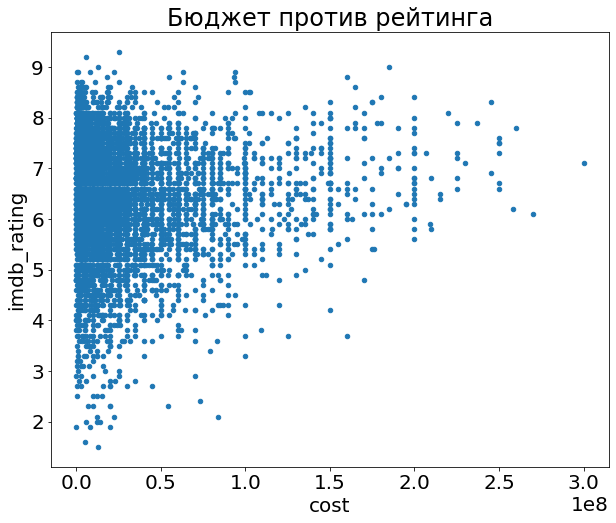

In [75]:
movies_df.plot(kind='scatter', x='cost', y='imdb_rating', title='Бюджет против рейтинга');

Построим гистограмму относительно одного столбца:

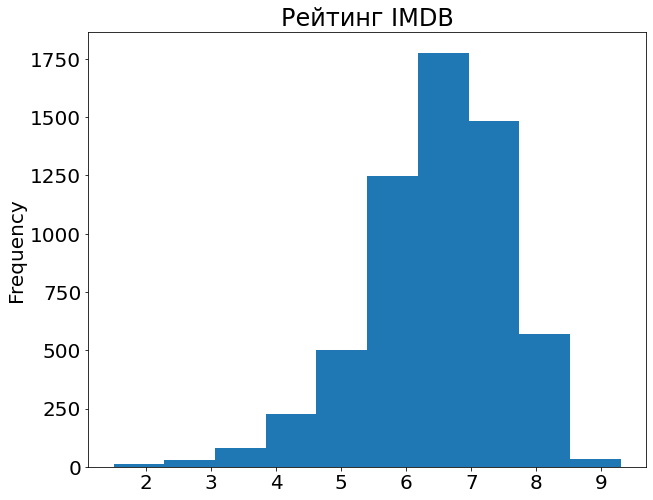

In [92]:
ax = movies_df['imdb_rating'].plot(kind='hist', title='Рейтинг IMDB', ylabel = "Частота")

In [94]:
ax.set_ylabel("Частота")

Text(26.200000000000003, 0.5, 'Частота')

In [98]:
plt.show()

Построим ящик с усами:

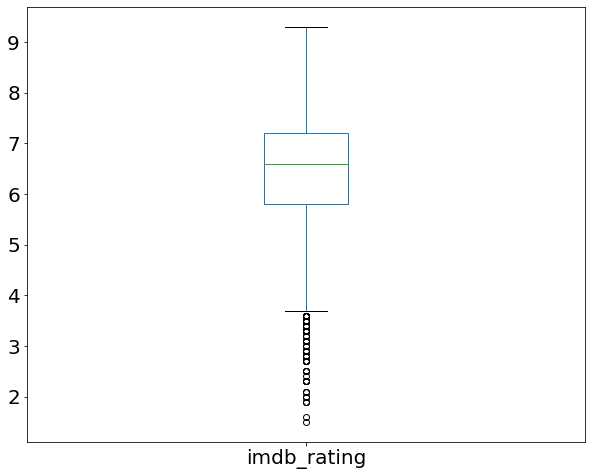

In [74]:
movies_df['imdb_rating'].plot(kind="box");

<figure>
<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif" />
    <figcaption>Source: *Flowing Data*</figcaption>
</figure>


Комбинируя категориальные и численные данные, мы можем построить распределение для "хорошего" и "плохого"

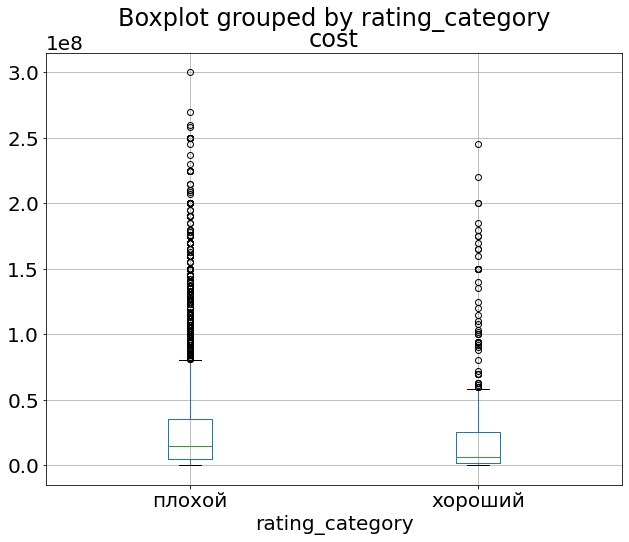

In [99]:
ax = movies_df.boxplot(column='cost', by='rating_category');

In [85]:
ax.set(xlabel="Качество")

[Text(0.5, 27.199999999999996, 'Качество')]

In [86]:
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [87]:
plt.show()